In [91]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, TimeDistributed, Bidirectional
from keras.layers import LSTM, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keras
import codecs
import os

%matplotlib inline

In [92]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)

In [93]:
data = pd.read_csv('posts.csv', names=['Author', 'Text'], sep=',', header=None)
data.head()

,Author,Text
0,22211,"Надо жить у моря, Мама.\n\nAdMe.ru публикует р..."
1,22211,Памятка трейдера.\n\nВыражения и термины приме...
2,22211,"Руслан Проводников или ""Сибирский Рокки"", как ..."
3,61454,"""Выбирай платья на лето"", ""готовься к лету вме..."
4,61454,"""Спят ли мамы?""- я не знала. На такой вопрос о..."


In [94]:
#from nltk.corpus import stopwords
#stop = stopwords.words('russian')
#data['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
#print('Stop words have been deleted')
#data['Text'].apply(lambda x: x.replace('\n', ' '));

### Подсчет количества слов в корпусе

In [95]:
data['CountWords'] = data['Text'].map(lambda x: len(x.split()))
print('Количество статей в корпусе:', len(data))

Количество статей в корпусе: 98442


### Удаление спам пользователей

In [96]:
spam_list = [301557842, 184330667, 191315693, 111604181, 212846761, 278053852, 281162155, 206300456, 306859957, 19006413, 275267400, 131629784, 276695686, 227968805, 65265920, 215657793, 212066696, 281866527, 172515637, 420657548, 259904924, 103086082, 36309849, 151622711, 304407589, 304407589, 234135027, 330779808, 135431520, 326927985, 22070189, 16497456, 22070189, 16497456, 120772826, 181255568, 24655736, 90966607, 102977537, 317336618, 189704404, 11663845, 57439210, 163452787, 38680483, 121144040, 211289578, 280155968, 198528079, 277512341, 33152119, 314327791, 229101154, 271546215, 4121239, 59729051, 288393060, 17620663, 296431137, 320666372, 153340241, 13309210, 333014765, 24595847, 152263680, 135815313, 27763994, 34902711, 200488318, 393710429, 400853612, 18091069, 232368999, 243123251, 159034443, 101820061, 334397479, 36372315, 18412482, 362494239, 98538332, 94983825, 171941220, 35386477, 179364423, 136668179, 57446172, 288223392, 321431512, 277994902, 190694040, 325021098, 129392296, 289027630, 216216545, 75884932, 208023062, 185965346, 2857932, 2574325, 154034429, 312715518, 286913827, 336049060, 163410643, 309938895, 372204020, 400615680, 235441786, 8391421, 136997064, 174934251, 173179778, 134275738, 93070783, 403039516, 326194938, 26960550, 18090797, 15931375, 64401851, 14665799, 223678239, 1963998, 252135842, 16352364, 386230491, 135103805, 335233013, 226605259, 94018354, 363143703, 278775919, 134780377,498638, 498638, 20403116, 824871, 22259914, 203601767, 386435681, 280519165, 225577927, 336493264, 203836012, 250362235, 135154139, 332671406, 296879545, 191398452, 48411613, 276175277, 77459397, 15155303, 6646818, 174692652, 25755928, 145799445, 210213078, 225680585, 167783297, 159347782, 154637631, 343704548, 276329737, 158954181, 7736592, 52430830, 54738353, 181641220, 249065698, 356566757, 12276180, 146475131, 38034256, 301152537, 181250759, 65169740, 229445819, 360098848, 204181735, 311981137, 9365217, 323032519, 144081373, 166471693, 219977388, 3252582, 92645976, 341675206, 394122042, 8469671, 293599275, 150564713, 315874927, 75299334, 395839270, 256327432, 8758868, 234523373, 234523373] 
print('Count of spam users:', len(spam_list))
lam = lambda row: row['Author'] not in spam_list
data = data[data.apply(lam, axis=1)]

Count of spam users: 201


In [97]:
author_count_news = data.Author.value_counts()
print('Количество авторов в корпусе:', len(author_count_news))
#print(author_count_news[:-8300: -1])
#author_count_news.plot(kind='bar', figsize=(15, 5), title="Number of author's articles");

Количество авторов в корпусе: 8410


### Количество статей у каждого пользователя

In [98]:
# Попробовать изменить количество статей у автора, у каждого 10 постов, 50, 100

num_classes = 50
skip_person = 7
author_count_news = author_count_news[skip_person:skip_person+num_classes]

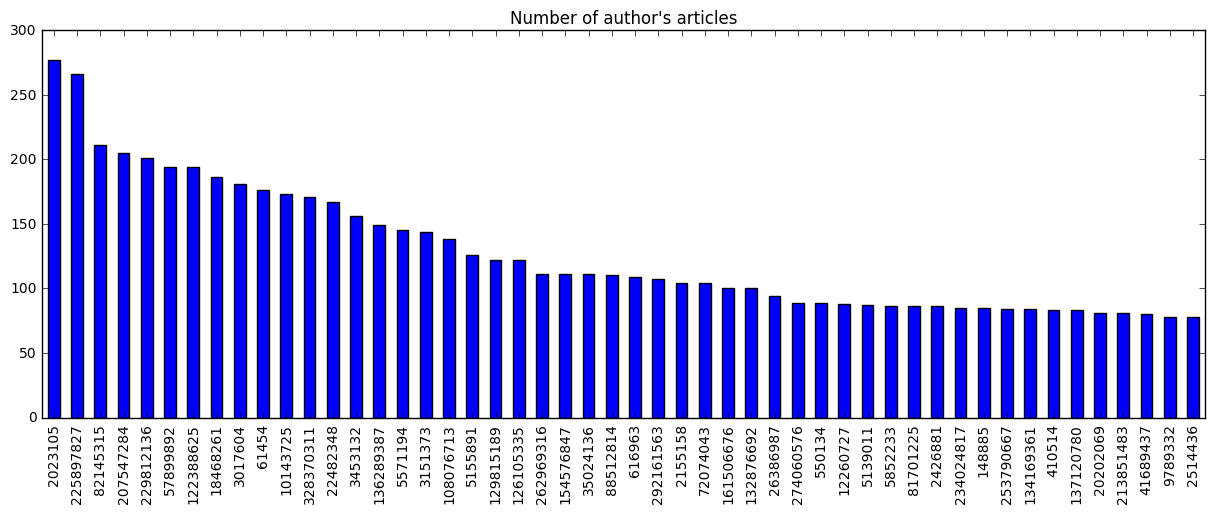

In [99]:
author_count_news.plot(kind='bar', figsize=(15, 5), title="Number of author's articles");

In [100]:
for i, (user_id, number) in enumerate(author_count_news.items()):
    print('User id', user_id)
    print(data[data.Author == user_id]['Text'][:2])
    print('===========')
    if i == 2:
        break

User id 2023105
2024    – Разве хегзы, это не те, кто взывает к легенд...
2025    — «Shoryuken» means «rising dragon fist», appa...
Name: Text, dtype: object
User id 225897827
70147    ✨✨ МОЙ МИР РАДУЕТ МЕНЯ СВОИМ ИЗОБИЛИЕМ И РАЗНО...
70148    "Мой новый взгляд на прощение или как я учусь ...
Name: Text, dtype: object
User id 82145315
32365    "... Полностью войдите в роль любителя, которы...
32366    "... Что бы мы ни говорили, что бы ни делали, ...
Name: Text, dtype: object


### Подготовка данных

In [101]:
temp_data = pd.DataFrame()
names_author = author_count_news.index.values

for author in names_author:
    temp_data = temp_data.append(data[data.Author == author])

data = temp_data
print('Количество статей после удаления:', len(data))

Количество статей после удаления: 6378


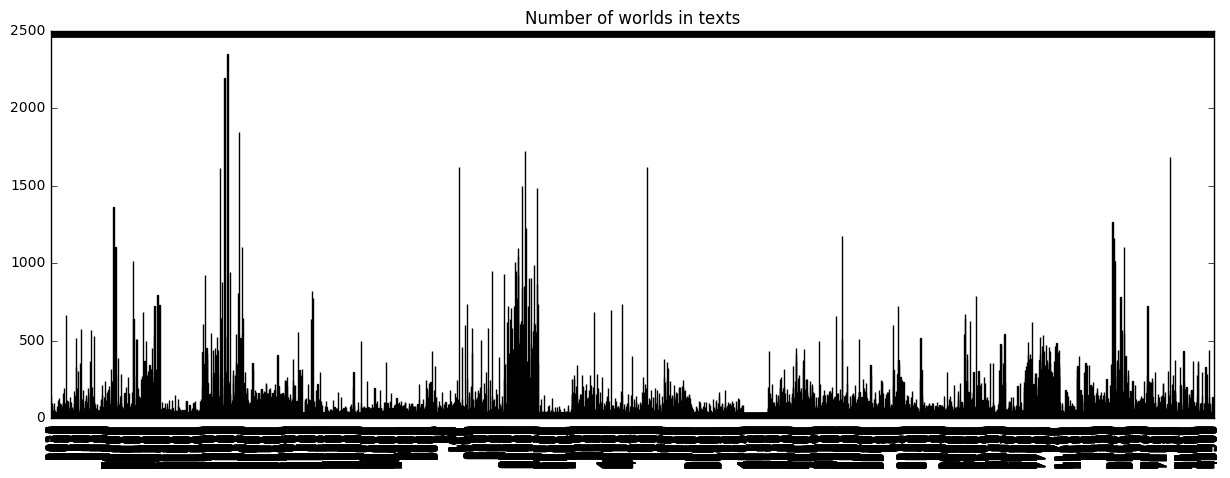

In [75]:
data.CountWords.plot(kind='bar', figsize=(15, 5), title="Number of worlds in texts");

In [102]:
# def remove_stopwords(data):
#     from nltk.corpus import stopwords
#     stop = stopwords.words('russian')
#     data['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
#     print('Stop words have been deleted')

In [103]:
# def get_lemmatization_corpus(data):
#     import pymorphy2
#     morph = pymorphy2.MorphAnalyzer()
#     data['TextLem'] = data['Text'].map(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split()]))
#     print('The lemmatization completed')

In [104]:
names = data.Author.value_counts().index.values

lableEnc = LabelEncoder()
lableEnc.fit(names.ravel()) 
lables = lableEnc.transform(names).reshape((num_classes, 1))

oneHotEnc = OneHotEncoder()
oneHotEnc.fit(lables)

for author in names:
    val = lableEnc.transform([author])[0]
    data.Author.replace(to_replace=author, value=val, inplace=True)

data.head()

,Author,Text,CountWords
2024,5,"– Разве хегзы, это не те, кто взывает к легенд...",145
2025,5,"— «Shoryuken» means «rising dragon fist», appa...",43
2026,5,"­­— Why wouldn't everyone be religious, you kn...",75
2027,5,Всё как в прошлый раз: дрожь по руке как от...,85
2028,5,"""- Вурдалаки! - надрывался старик. Кто-то пред...",50


In [105]:
# Перемешать набор данных и удалить index столбец
data = data.sample(frac=1).reset_index(drop=True)

### Токенизация текста

In [106]:
def get_texts_to_matrix(texts, max_features = 0):
    tokenizer = Tokenizer(split=" ", lower=True)
    if max_features != 0:
        tokenizer = Tokenizer(split=" ", lower=True, num_words=max_features)
    
    tokenizer.fit_on_texts(texts)
    matrix_tfidf = tokenizer.texts_to_matrix(texts=texts, mode='tfidf')
    print('Количество текстов:', matrix_tfidf.shape[0])
    print('Количество токенов:', matrix_tfidf.shape[1])
    return matrix_tfidf

In [107]:
# Убрать LowerCase

def get_texts_to_sequences(text):
    # создаем единый словарь (слово -> число) для преобразования
    tokenizer = Tokenizer(split=" ", lower=False)
    tokenizer.fit_on_texts(text)
    # Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
    text_sequences = tokenizer.texts_to_sequences(text)
    print('В словаре {} слов'.format(len(tokenizer.word_index)))
    return text_sequences

In [108]:
def get_texts_to_gramm_sequences(texts, count_gramm = 3):
    gramms = {}
    counter_gramm = 0
    result = []
    temp_vector = []
    
    for text in texts:
        for i in range(len(text) - count_gramm - 1):
            gramm = text[i : i + count_gramm]
            if gramms.get(gramm) == None:
                gramms[gramm] = counter_gramm
                counter_gramm += 1
            temp_vector.append(gramms[gramm])
        result.append(temp_vector)
        temp_vector = []
        
    print('Количество грамм в корпусе:', len(gramms))
    #count_gramm = [len(x) for x in text_threegramm]
    #num = np.array(count_gramm)
    #num.mean()
    return result

In [109]:
#X = get_texts_to_matrix(data['Text'], 80000)
#X = get_texts_to_gramm_sequences(data['Text'])
X = get_texts_to_sequences(data['Text'])

В словаре 111579 слов


In [110]:
X[0]

[9133,
 3479,
 1591,
 2347,
 4389,
 26714,
 9134,
 1,
 26715,
 130,
 2989,
 2076,
 176,
 805,
 2,
 1307,
 19329,
 307,
 12412,
 86,
 253,
 48,
 584,
 87,
 39,
 1357,
 2524,
 43367,
 20,
 105,
 4,
 19330,
 4675,
 25,
 26716,
 220,
 12413,
 26717,
 26718,
 39,
 34,
 1234,
 30,
 2,
 7148,
 8,
 9,
 73,
 900,
 10547,
 277]

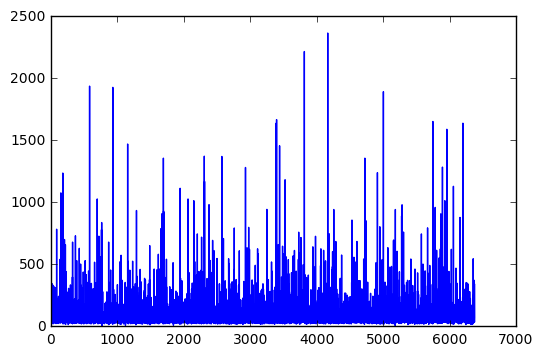

In [111]:
#plt.plot(X)
means = [len(x) for x in X]
plt.plot(means);
#X.plot(kind='bar', figsize=(15, 5), title="Number of worlds in texts");

### Разбиваем выборку на тестовую и тренировочную

In [112]:
def get_X_y_for_traning(X, y, num_words):
    #tokenizer = Tokenizer(num_words=num_words)
    #X = tokenizer.sequences_to_matrix(X, mode='binary')

    X = keras.preprocessing.sequence.pad_sequences(X, maxlen=num_words)     
    y = keras.utils.to_categorical(y, num_classes)
    print('Размерность X:', X.shape)
    print('Размерность y:', y.shape)
    return X, y

In [113]:
num_classes

50

In [115]:
# Максимальное количество слов в самом длинном тексте
num_words = 500
X_full, y_full = get_X_y_for_traning(X, data.Author, num_words)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

print('Testing set size:', len(X_test))
print('Training set size:', len(X_train))

Размерность X: (6378, 500)
Размерность y: (6378, 50)
Testing set size: 1276
Training set size: 5102


### Accuracy в зависимости от параметров Dropout
![alt text](https://2.downloader.disk.yandex.ru/preview/8e14c7756af3174dd350c25f3e6b8440a61e9a777ee2da314fd9f7fdd3091b2f/inf/rO8FnfsfSlEfAA1AjPLcJ2uQGpv-ZqVMnu5RumfWpo4yKYIGlxh3eJRayw6TcMCHwESHEemqBkkmTZnnheB-xQ%3D%3D?uid=0&filename=2018-02-04_19-53-32.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&size=XXL&crop=0 "Logo Title Text 1")

### Accuracy в зависимости от Learning Rate
![alt text](https://2.downloader.disk.yandex.ru/preview/fa7057505b329e83b102d9815718569bd8495582c48d5fbe83bc35b0615263ce/inf/rO8FnfsfSlEfAA1AjPLcJ3LSAMr9nlqY5MHCpTZ2V9rMkRavocK8rFQ9rEwG9gspdkhMcLPBICDpAd1YRkHHlw%3D%3D?uid=0&filename=2018-02-04_19-54-48.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&size=XXL&crop=0 "Logo Title Text 1")

### Accuracy в зависимости от Batch size
![alt text](https://4.downloader.disk.yandex.ru/disk/8eb281727507e6d15620d94175cec3ed4f509b3c40e5a820a1044c1e989e2dda/5a775771/rO8FnfsfSlEfAA1AjPLcJ6926tWJn_ypr-A-mql52eNcQXSffjilIJqUiUafRUZuc-1sR5I9yDwgiCUs2xFu6g%3D%3D?uid=0&filename=2018-02-04_19-56-28.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&fsize=29996&hid=308d82806a74c28ee7ee9c1432dbc6ba&media_type=image&tknv=v2&etag=849c2457f9719ab80079d07e58f899d9 "Logo Title Text 1")


### Создание модели нейронной сети

In [54]:
def get_lstm_model(input_length):
    model = Sequential()
    model.add(Embedding(input_length, 200))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
def get_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(80000, 200))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(10, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
def get_conv_conv_model():
    model = Sequential()
    model.add(Embedding(160000, 300))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
def get_conv_lstm_model():
    model = Sequential()
    #model.add(Dense(102562, activation='relu', input_shape=(8664, 600)))
    model.add(Embedding(100000, 200))
    model.add(SpatialDropout1D(0.3))
    #model.add(TimeDistributed(Conv1D(filters=512, kernel_size=3, activation='relu')))
    #model.add(TimeDistributed(GlobalMaxPooling1D()))
    #model.add(TimeDistributed(Flatten()))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D())
    #model.add(Flatten())
    model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
def get_lstm_conv_model():
    model = Sequential()
    model.add(Embedding(160000, 300))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)) 
    #model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='sigmoid'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [116]:
def get_conv_model():
    model = Sequential()
    model.add(Embedding(111579, 200))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [117]:
%%time
#model = get_lstm_model(120000) # 34.10 10-epoch
#model = get_bidirectional_lstm() # 50.86 20-epoch
model = get_conv_model() # 53.1 6-epoch
#model = get_conv_conv_model() # 54.04 7-epoch
#model = get_conv_lstm_model() # 53.17 10-epoch
#model = get_lstm_conv_model() # 52.60 10-epoch

model.summary()

BATCH_SIZE = 64
EPOCHS = 7
VERBOSE = 2

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=VERBOSE, 
                    validation_split=0.1, 
                    #callbacks=[EarlyStopping(monitor='val_loss')]
                   )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         22315800  
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, None, 200)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 512)         307712    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                25650     
Total params: 22,649,162
Trainable params: 22,649,162
Non-trainable params: 0
_________________________________________________________________
Train on 4591 samples, validate on 511 samples
Epoch 1/7
8s - loss: 3.8227 - acc: 0.0647 - val_loss: 3.7303 - val_acc: 0.0705
Epoc

In [118]:
print('Точность модели составляет: {}'.format(model.evaluate(X_test, y_test, batch_size=64, verbose=2)[1] * 100))

Точность модели составляет: 49.84326054309977


dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


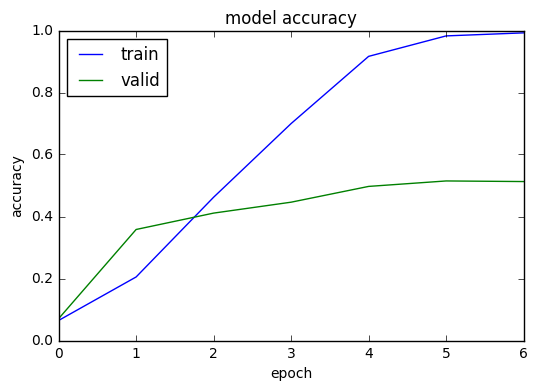

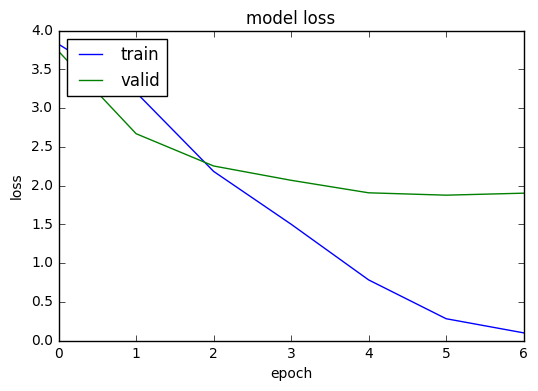

In [119]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show();
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show();

In [44]:
def save_model(model, model_name):
    # Генерируем описание модели в формате json
    model_json = model.to_json()
    # Записываем модель в файл
    json_file = open("model/{}_model.json".format(model_name), "w")
    json_file.write(model_json)
    json_file.close()
    model.save_weights("model/{}_weights.h5".format(model_name))
    print('Модель и веса успешно сохранены!')

In [58]:
save_model(model, 'vk_98percent_cnn')

Модель и веса успешно сохранены!
